<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/15-Random-Forests/01-Random-Forest-Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest - Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [2]:
df = pd.read_csv('/content/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Signal   300 non-null    float64
 1   Density  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<Axes: xlabel='Signal', ylabel='Density'>

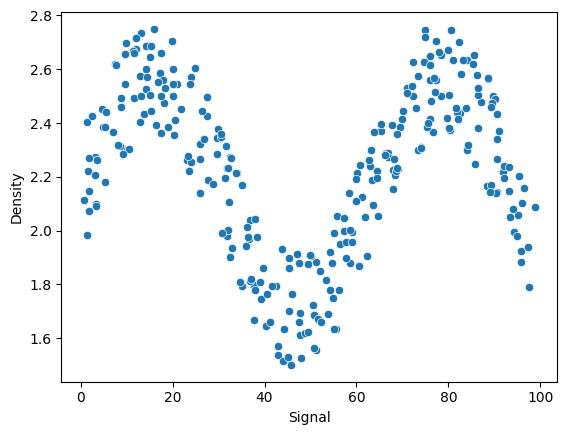

In [3]:
df.columns = ['Signal', 'Density']

sns.scatterplot(df, x='Signal', y='Density')

## Splitting the Data

In [5]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

# Linear Regression

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, lr_preds))

0.32820694560064795

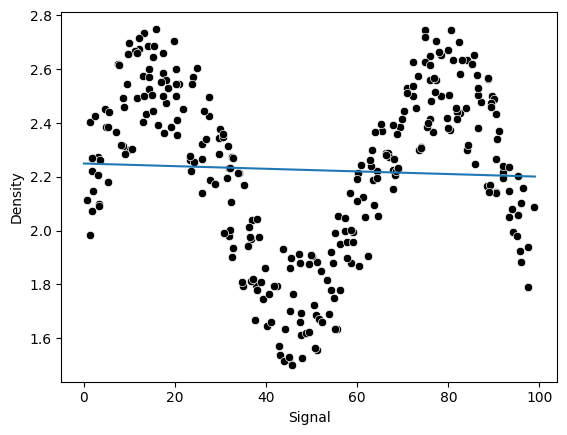

In [7]:
signal_range = np.arange(0,100)
lr_output = lr_model.predict(signal_range.reshape(-1,1))

sns.scatterplot(df, x='Signal', y='Density', color='black')
plt.plot(signal_range, lr_output)

# Polynomial Regression

## Function to Help Run Models

RMSE : 0.32820694560064795


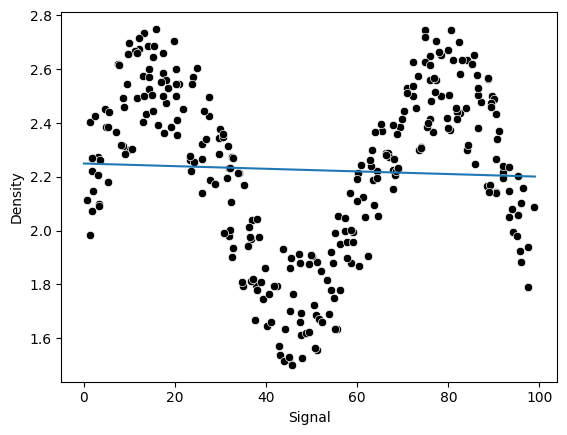

In [15]:
def run_model(model, X_train, y_train, X_test, y_test):
    # Fit Model
    model.fit(X_train, y_train)

    # Get Metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'RMSE : {rmse}')

    # Plot Results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))

    sns.scatterplot(df, x='Signal', y='Density', color='black')
    plt.plot(signal_range, output)

run_model(lr_model, X_train, y_train, X_test, y_test)

## Pipeline for Poly Orders

RMSE : 0.30408005621570655


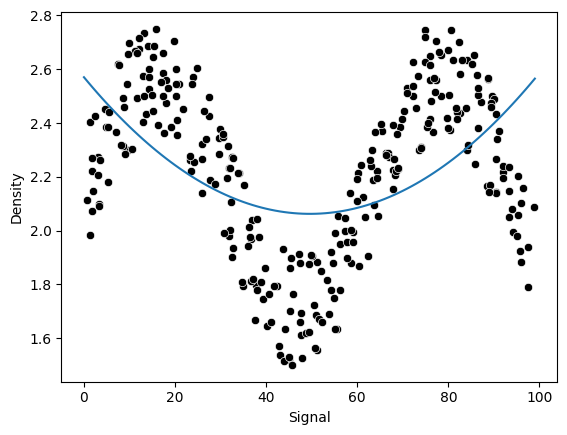

In [9]:
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

## Comparing Various Polynomial Orders

RMSE : 0.1347977342137291


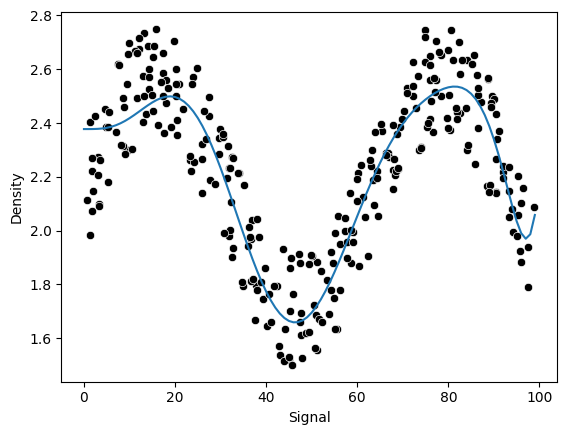

In [10]:
pipe = make_pipeline(PolynomialFeatures(10), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

# KNN Regression

RMSE : 0.1965668752084094
RMSE : 0.1340295145577662
RMSE : 0.1307486674797085


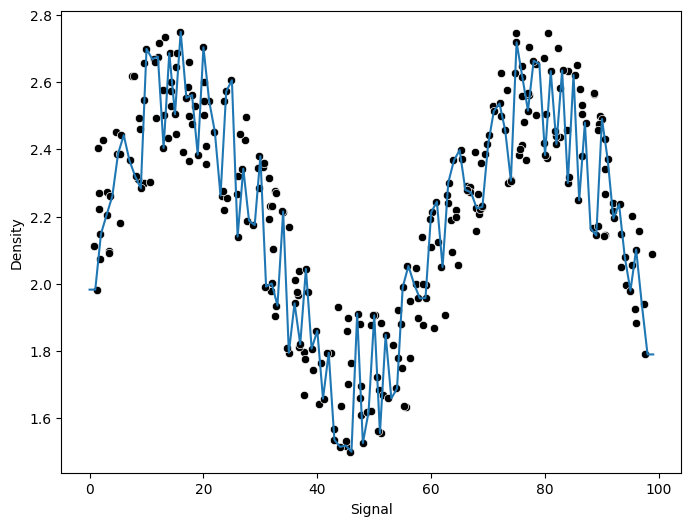

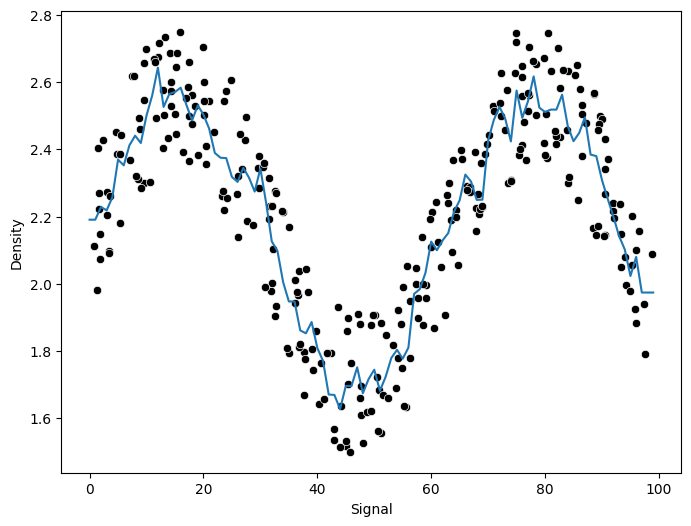

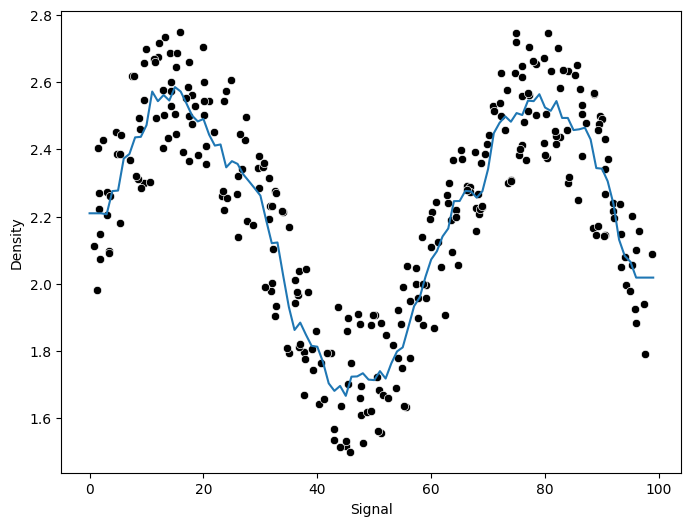

In [27]:
preds = {}
k_vals = [1,5,10]

for n in k_vals:
  model = KNeighborsRegressor(n_neighbors=n)
  plt.figure(figsize=(8,6))
  run_model(model, X_train, y_train, X_test, y_test)

# Decision Tree Regression

RMSE : 0.1965668752084094


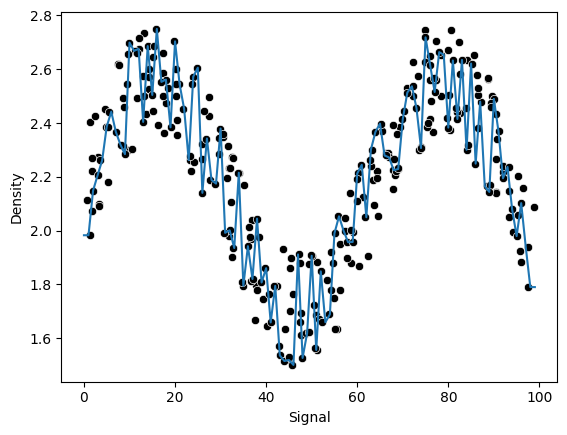

In [20]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

# Support Vector Regression

RMSE : 0.13366187279042066


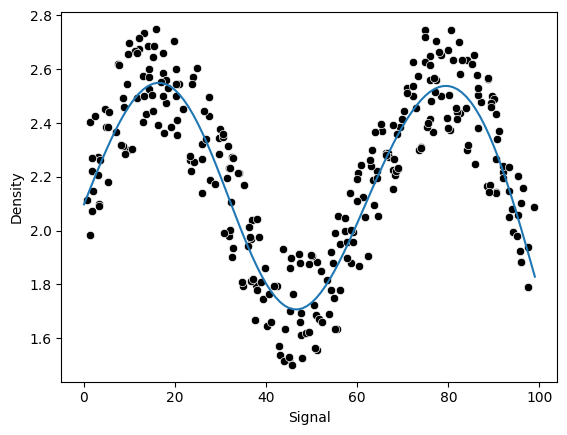

In [21]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()
grid = GridSearchCV(svr, param_grid)
run_model(grid, X_train, y_train, X_test, y_test)

In [22]:
grid.best_estimator_

SVR(C=5)

# Random Forest Regression

RMSE : 0.1693086082664641
RMSE : 0.16054726623493543
RMSE : 0.15822540708631566


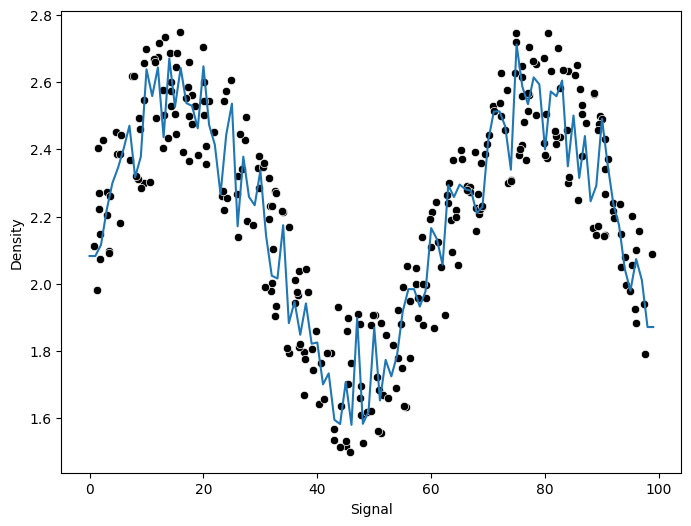

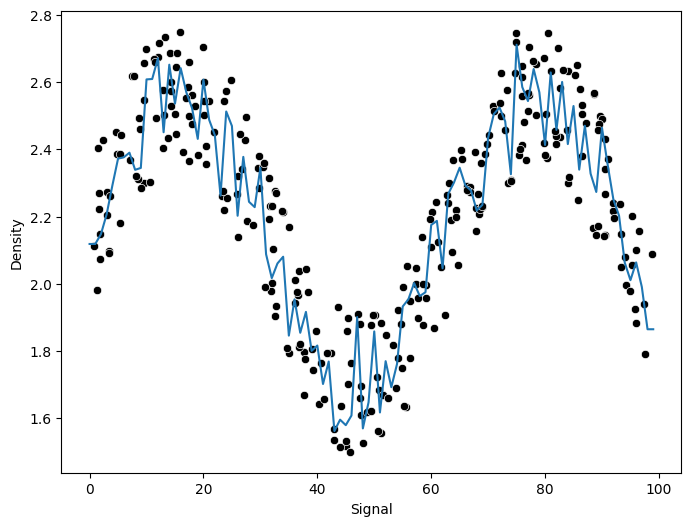

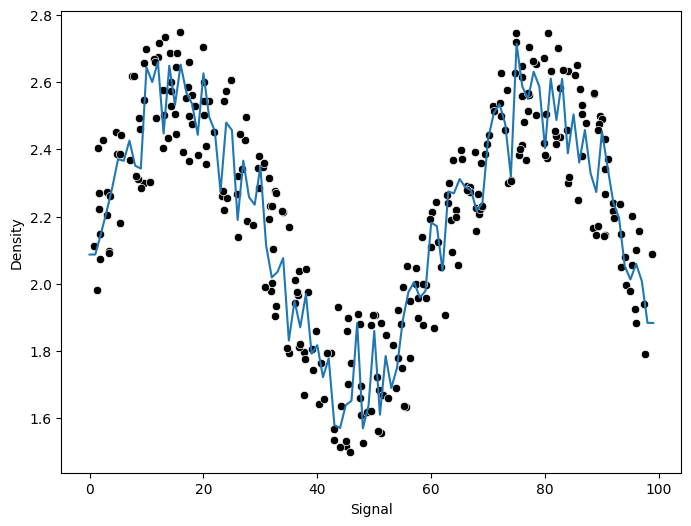

In [28]:
trees = [10,50,100]

for n in trees:
  model = RandomForestRegressor(n_estimators=n)
  plt.figure(figsize=(8,6))
  run_model(model, X_train, y_train, X_test, y_test)

# Gradient Boosting

RMSE : 0.1486926009626336


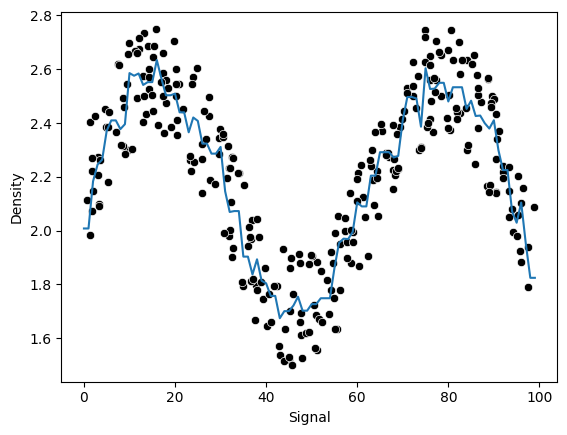

In [30]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

# Adaboost

RMSE : 0.1400995288438093


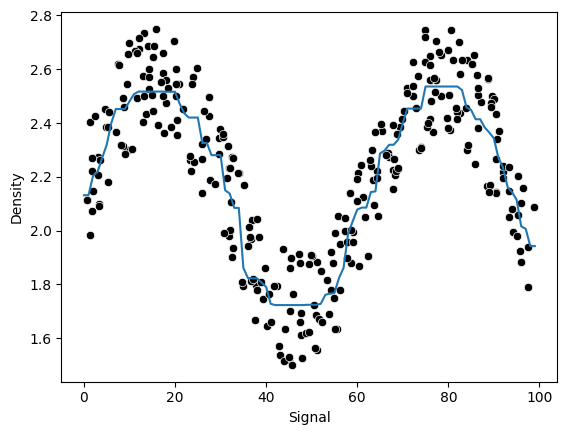

In [31]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)